# PINN Models - Loss Plots

This notebook loads all trained PINN models and visualizes their training loss histories.

## Models:
1. **PINN_forward**: Basic PINN with fixed Lambda parameter (Forward model)
2. **PINN_Lambda**: PINN with learnable Lambda parameter (Inverse model)
3. **PINN_AB**: PINN with learnable A and B parameters (Inverse model)
4. **PINN_NN**: PINN with neural network for segregation velocity prediction (Inverse model)

## Data Files:
- **Forward_data.xlsx**: Ground truth data for forward PINN (PINN_forward)
- **Inverse_data.xlsx**: Ground truth data for inverse PINN models (PINN_Lambda, PINN_AB, PINN_NN)


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Get the current directory (where this notebook is located)
current_dir = Path.cwd()
print(f"Current directory: {current_dir}")

# Data files are in the current directory
forward_data_path = current_dir / 'Forward_data.xlsx'
inverse_data_path = current_dir / 'Inverse_data.xlsx'
inverse_data_path2 = current_dir / 'experimental_data.csv'


Using device: cpu
Current directory: /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots


# Loss Plots

This section generates Loss plots with respect to epochs for all models.


In [3]:
# Define paths to model checkpoints
# Try multiple possible locations for each model
model_paths = {
    'PINN_forward': [
        current_dir / 'models' / 'pinn_forward.pth',
        current_dir / 'pinn_forward.pth',
    ],
    'PINN_Lambda': [
        current_dir / 'models' / 'pinn_inverse_Lambda.pth',
        current_dir / 'pinn_inverse_Lambda.pth',
    ],
    'PINN_AB': [
        current_dir / 'models' / 'pinn_inverse_AB.pth',
        current_dir / 'pinn_inverse_AB.pth',
    ],
    'PINN_NN': [
        current_dir / 'models' / 'pinn_inverse_NN.pth',
        current_dir / 'pinn_inverse_NN.pth',
    ]
}

# Load all available models
models_data = {}

for model_name, possible_paths in model_paths.items():
    loaded = False
    for model_path in possible_paths:
        if model_path.exists():
            try:
                checkpoint = torch.load(model_path, map_location=device)
                models_data[model_name] = {
                    'checkpoint': checkpoint,
                    'loss_history': checkpoint.get('loss_history', []),
                    'path': str(model_path)
                }
                print(f"✓ Loaded {model_name} from {model_path}")
                if 'loss_history' in checkpoint:
                    print(f"  - Loss history entries: {len(checkpoint['loss_history'])}")
                loaded = True
                break
            except Exception as e:
                print(f"✗ Error loading {model_name} from {model_path}: {e}")
                continue
    
    if not loaded:
        print(f"✗ Model file not found for {model_name} (tried {len(possible_paths)} locations)")

print(f"\nTotal models loaded: {len(models_data)}")


✓ Loaded PINN_forward from /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots/pinn_forward.pth
  - Loss history entries: 20000
✓ Loaded PINN_Lambda from /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots/pinn_inverse_Lambda.pth
  - Loss history entries: 20000
✓ Loaded PINN_AB from /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots/pinn_inverse_AB.pth
  - Loss history entries: 20000
✓ Loaded PINN_NN from /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots/pinn_inverse_NN.pth
  - Loss history entries: 20000

Total models loaded: 4


In [4]:
# Display information about loaded models
for model_name, data in models_data.items():
    checkpoint = data['checkpoint']
    loss_history = data['loss_history']
    
    print(f"\n{model_name}:")
    print(f"  Parameters in checkpoint: {list(checkpoint.keys())}")
    
    if loss_history:
        # Get available loss components from first entry
        first_entry = loss_history[0]
        print(f"  Loss components: {list(first_entry.keys())}")
        print(f"  Total epochs: {len(loss_history)}")
        
        # Show final loss values
        final_entry = loss_history[-1]
        if 'total' in final_entry:
            print(f"  Final total loss: {final_entry['total']:.6e}")
    else:
        print(f"  Warning: No loss history found in checkpoint")



PINN_forward:
  Parameters in checkpoint: ['model_state_dict', 'Lambda', 'Pe', 'k', 'tEnd', 'loss_history', 'layers', 'x_min', 'x_max', 'z_min', 'z_max', 't_min', 't_max', 'pde points', 'bc_inlet points', 'bc_top points', 'bc_bottom points', 'bc_outlet points', 'ic points']
  Loss components: ['epoch', 'total', 'pde', 'bc_inlet', 'bc_top', 'bc_bottom', 'ic']
  Total epochs: 20000
  Final total loss: 1.491190e-04

PINN_Lambda:
  Parameters in checkpoint: ['model_state_dict', 'Lambda', 'Lambda_init', 'Pe', 'k', 'tEnd', 'loss_history', 'layers', 'x_min', 'x_max', 'z_min', 'z_max', 't_min', 't_max', 'pde points', 'bc_inlet points', 'bc_top points', 'bc_bottom points', 'bc_outlet points', 'ic points', 'exp points']
  Loss components: ['epoch', 'total', 'pde', 'bc_inlet', 'bc_top', 'bc_bottom', 'ic', 'lambda', 'data']
  Total epochs: 20000
  Final total loss: 5.543454e-04

PINN_AB:
  Parameters in checkpoint: ['model_state_dict', 'A', 'B', 'A_init', 'B_init', 'Gamma', 'Pe', 'k', 'tEnd', 'lo

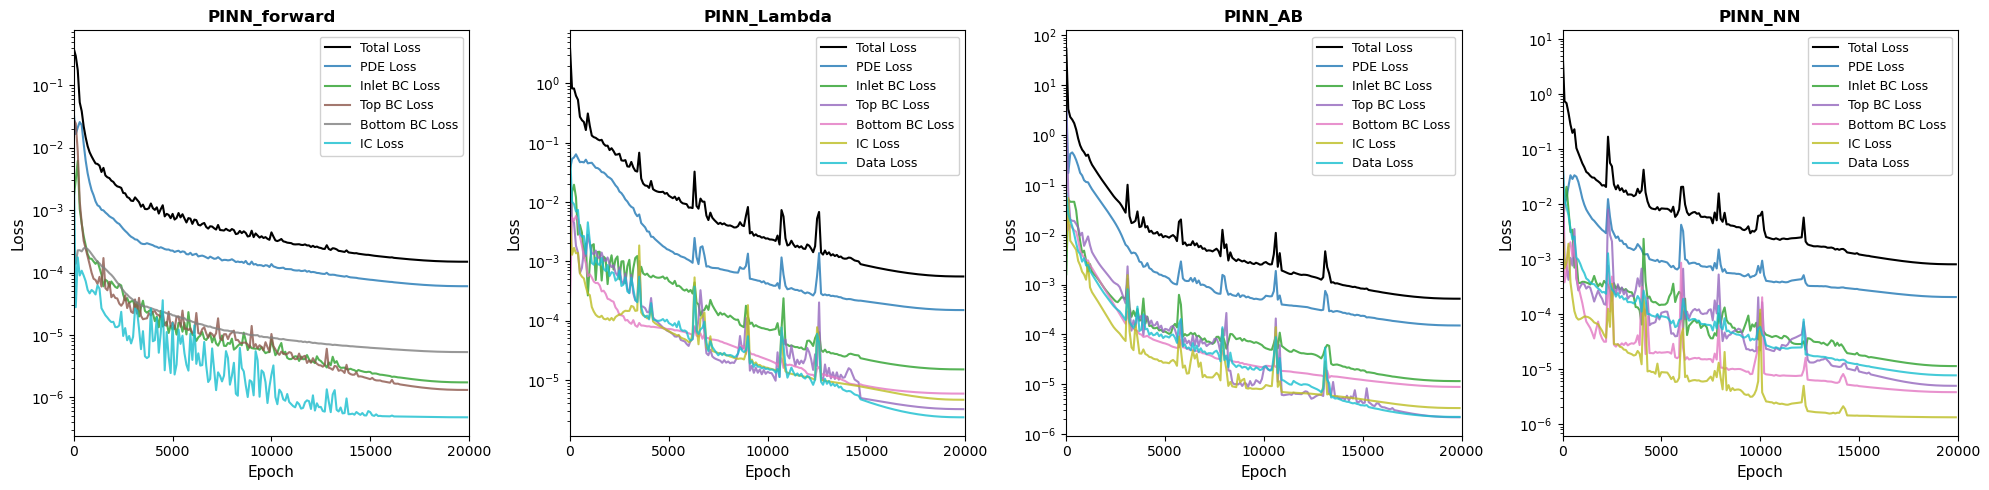

✓ Plotted loss history for PINN_forward (20000 epochs)
✓ Plotted loss history for PINN_Lambda (20000 epochs)
✓ Plotted loss history for PINN_AB (20000 epochs)
✓ Plotted loss history for PINN_NN (20000 epochs)


In [65]:
# Plot all loss values (including total) vs epochs for each model
# Create a single figure with 4 subplots (1 row, 4 columns)
if not models_data:
    print("No models loaded. Please ensure model files exist in their respective directories.")
else:
    # Mapping from loss component keys to formal names
    loss_name_mapping = {
        'pde': 'PDE Loss',
        'bc_inlet': 'Inlet BC Loss',
        'bc_top': 'Top BC Loss',
        'bc_bottom': 'Bottom BC Loss',
        'ic': 'IC Loss',
        'data': 'Data Loss'
    }
    
    # Get list of model names in order
    model_names = list(models_data.keys())
    num_models = len(model_names)
    
    # Create figure with 4 subplots in 1 row
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # If we have fewer than 4 models, adjust axes
    if num_models < 4:
        axes = axes[:num_models] if num_models > 1 else [axes]
    
    # Plot each model in its subplot
    for idx, model_name in enumerate(model_names):
        data = models_data[model_name]
        loss_history = data['loss_history']
        
        if not loss_history:
            print(f"Skipping {model_name}: No loss history available")
            axes[idx].text(0.5, 0.5, f'No data\nfor {model_name}', 
                          ha='center', va='center', transform=axes[idx].transAxes)
            axes[idx].set_title(model_name, fontsize=12, fontweight='bold')
            continue
        
        # Extract epochs and loss values
        epochs = [entry['epoch'] for entry in loss_history]
        total_loss = [entry['total'] for entry in loss_history]
        max_epoch = max(epochs)
        
        # Get all loss components (excluding 'epoch' and 'total')
        loss_components = [key for key in loss_history[0].keys() 
                          if key not in ['epoch', 'total', 'lambda', 'A', 'B']]
        
        # Plot total loss first (with distinct style)
        axes[idx].semilogy(epochs[::100], total_loss[::100], 'k-', linewidth=1.5, label='Total Loss', zorder=10)
        
        # Plot individual loss components
        colors = plt.cm.tab10(np.linspace(0, 1, len(loss_components)))
        for i, component in enumerate(loss_components):
            component_values = [entry[component] for entry in loss_history]
            # Use formal name if available, otherwise use component name
            label = loss_name_mapping.get(component, component)
            axes[idx].semilogy(epochs[::100], component_values[::100], '-', 
                             color=colors[i], linewidth=1.5, label=label, alpha=0.8)
        
        axes[idx].set_xlabel('Epoch', fontsize=11)
        axes[idx].set_ylabel('Loss', fontsize=11)
        axes[idx].set_title(model_name, fontsize=12, fontweight='bold')
        axes[idx].legend(fontsize=9, loc='best', framealpha=0.9)
        # axes[idx].grid(True, alpha=0.3)
        axes[idx].set_xlim([0, max_epoch + 1])
        
        # Set x-axis ticks to show every 5000 epochs
        tick_step = 5000
        x_ticks = np.arange(0, max_epoch + tick_step, tick_step)
        axes[idx].set_xticks(x_ticks)
    
    plt.tight_layout()
    plt.savefig('Loss_Plots.pdf', dpi=600)
    plt.show()
    
    # Print summary
    for model_name in model_names:
        if models_data[model_name]['loss_history']:
            epochs = [entry['epoch'] for entry in models_data[model_name]['loss_history']]
            print(f"✓ Plotted loss history for {model_name} ({len(epochs)} epochs)")


# Concentration Field Plots

This section generates concentration field plots at specific time points for all models and ground truth.


In [6]:
import torch.nn as nn
import pandas as pd
from scipy.interpolate import griddata

# Define model classes
class PINN(nn.Module):
    """Basic PINN model"""
    def __init__(self, layers):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
        for layer in self.layers:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)
    
    def forward(self, x, z, t):
        inputs = torch.cat([x, z, t], dim=1)
        for i, layer in enumerate(self.layers[:-1]):
            inputs = torch.tanh(layer(inputs))
        output = torch.sigmoid(self.layers[-1](inputs))
        return output

class PINN_Lambda(nn.Module):
    """PINN with learnable Lambda"""
    def __init__(self, layers, lambda_init=0.78):
        super(PINN_Lambda, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
        for layer in self.layers:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)
        self.log_lambda = nn.Parameter(torch.tensor(np.log(lambda_init), dtype=torch.float32))
    
    @property
    def Lambda(self):
        return torch.exp(self.log_lambda)
    
    def forward(self, x, z, t):
        inputs = torch.cat([x, z, t], dim=1)
        for i, layer in enumerate(self.layers[:-1]):
            inputs = torch.tanh(layer(inputs))
        output = torch.sigmoid(self.layers[-1](inputs))
        return output

class PINN_AB(nn.Module):
    """PINN with learnable A and B"""
    def __init__(self, layers, A_init=0.5, B_init=1.5):
        super(PINN_AB, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
        for layer in self.layers:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)
        self.log_A = nn.Parameter(torch.tensor(np.log(A_init), dtype=torch.float32))
        self.log_B = nn.Parameter(torch.tensor(np.log(B_init), dtype=torch.float32))
    
    @property
    def A(self):
        return torch.exp(self.log_A)
    
    @property
    def B(self):
        return torch.exp(self.log_B)
    
    def forward(self, x, z, t):
        inputs = torch.cat([x, z, t], dim=1)
        for i, layer in enumerate(self.layers[:-1]):
            inputs = torch.tanh(layer(inputs))
        output = torch.sigmoid(self.layers[-1](inputs))
        return output

# For PINN_NN
class SegregationVelocityNet(nn.Module):
    def __init__(self, layers):
        super(SegregationVelocityNet, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
        for layer in self.layers:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)
    
    def forward(self, x, z, t, gamma_dot, c):
        inputs = torch.cat([x, z, t, gamma_dot, c], dim=1)
        for i, layer in enumerate(self.layers[:-1]):
            inputs = torch.tanh(layer(inputs))
        output = self.layers[-1](inputs)
        return output

class CombinedPINN(nn.Module):
    def __init__(self, conc_layers, seg_layers):
        super(CombinedPINN, self).__init__()
        self.conc_net = PINN(conc_layers)
        self.seg_net = SegregationVelocityNet(seg_layers)
    
    def forward_conc(self, x, z, t):
        return self.conc_net(x, z, t)
    
    def forward_seg(self, x, z, t, gamma_dot, c):
        return self.seg_net(x, z, t, gamma_dot, c)

print("Model classes defined")


Model classes defined


In [7]:
# Load models with their architectures
loaded_models = {}

# PINN_forward
if 'PINN_forward' in models_data:
    checkpoint = models_data['PINN_forward']['checkpoint']
    layers = [3, 64, 64, 64, 64, 1]
    model = PINN(layers).to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    loaded_models['PINN_forward'] = {
        'model': model,
        'x_min': 0.0, 'x_max': 1.0,
        'z_min': -1.0, 'z_max': 0.0,
        't_max': checkpoint.get('tEnd', 10.0),
        'forward_method': 'forward'
    }
    print(f"✓ Loaded PINN_forward")

# PINN_Lambda
if 'PINN_Lambda' in models_data:
    checkpoint = models_data['PINN_Lambda']['checkpoint']
    layers = [3, 64, 64, 64, 64, 1]
    lambda_init = checkpoint.get('Lambda', 0.78) if 'Lambda' in checkpoint else 0.78
    # If Lambda is a tensor, get its value
    if isinstance(lambda_init, torch.Tensor):
        lambda_init = lambda_init.item()
    model = PINN_Lambda(layers, lambda_init=lambda_init).to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    loaded_models['PINN_Lambda'] = {
        'model': model,
        'x_min': 0.0, 'x_max': 1.0,
        'z_min': -1.0, 'z_max': 0.0,
        't_max': checkpoint.get('tEnd', 20.0),
        'forward_method': 'forward'
    }
    print(f"✓ Loaded PINN_Lambda (Lambda={model.Lambda.item():.4f})")

# PINN_AB
if 'PINN_AB' in models_data:
    checkpoint = models_data['PINN_AB']['checkpoint']
    layers = [3, 64, 64, 64, 64, 1]
    A_init = checkpoint.get('A', 0.5) if 'A' in checkpoint else 0.5
    B_init = checkpoint.get('B', 1.5) if 'B' in checkpoint else 1.5
    if isinstance(A_init, torch.Tensor):
        A_init = A_init.item()
    if isinstance(B_init, torch.Tensor):
        B_init = B_init.item()
    model = PINN_AB(layers, A_init=A_init, B_init=B_init).to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    loaded_models['PINN_AB'] = {
        'model': model,
        'x_min': 0.0, 'x_max': 1.0,
        'z_min': -1.0, 'z_max': 0.0,
        't_max': checkpoint.get('tEnd', 20.0),
        'forward_method': 'forward'
    }
    print(f"✓ Loaded PINN_AB (A={model.A.item():.4f}, B={model.B.item():.4f})")

# PINN_NN
if 'PINN_NN' in models_data:
    checkpoint = models_data['PINN_NN']['checkpoint']
    conc_layers = checkpoint.get('conc_layers', [3, 64, 64, 64, 64, 1])
    seg_layers = checkpoint.get('seg_layers', [5, 32, 32, 32, 1])
    model = CombinedPINN(conc_layers, seg_layers).to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    loaded_models['PINN_NN'] = {
        'model': model,
        'x_min': checkpoint.get('x_min', 0.0),
        'x_max': checkpoint.get('x_max', 1.0),
        'z_min': checkpoint.get('z_min', -1.0),
        'z_max': checkpoint.get('z_max', 0.0),
        't_max': checkpoint.get('tEnd', 20.0),
        'forward_method': 'forward_conc'
    }
    print(f"✓ Loaded PINN_NN")

print(f"\nTotal models ready for prediction: {len(loaded_models)}")


✓ Loaded PINN_forward
✓ Loaded PINN_Lambda (Lambda=1.2007)
✓ Loaded PINN_AB (A=0.5254, B=0.0536)
✓ Loaded PINN_NN

Total models ready for prediction: 4


In [8]:
# Function to predict concentration field at a specific time
def predict_concentration_field(model_info, t_value, n_x=100, n_z=100):
    """
    Predict concentration field c(x, z, t) at a specific time point.
    
    Args:
        model_info: Dictionary with 'model', 'x_min', 'x_max', 'z_min', 'z_max', 'forward_method'
        t_value: Time value
        n_x: Number of grid points in x direction
        n_z: Number of grid points in z direction
    
    Returns:
        X, Z, C: Meshgrid arrays and concentration values
    """
    model = model_info['model']
    x_min = model_info['x_min']
    x_max = model_info['x_max']
    z_min = model_info['z_min']
    z_max = model_info['z_max']
    forward_method = model_info['forward_method']
    
    # Create grid
    x_vis = torch.linspace(x_min, x_max, n_x, device=device).reshape(-1, 1)
    z_vis = torch.linspace(z_min, z_max, n_z, device=device).reshape(-1, 1)
    X_vis, Z_vis = torch.meshgrid(x_vis.squeeze(), z_vis.squeeze(), indexing='ij')
    
    # Evaluate at specific time
    t_vis = torch.ones_like(X_vis.reshape(-1, 1)) * t_value
    
    # Predict concentration
    with torch.no_grad():
        if forward_method == 'forward_conc':
            c_vis = model.forward_conc(X_vis.reshape(-1, 1), Z_vis.reshape(-1, 1), t_vis)
        else:
            c_vis = model(X_vis.reshape(-1, 1), Z_vis.reshape(-1, 1), t_vis)
    
    C_vis = c_vis.reshape(n_x, n_z).cpu().numpy()
    X_np = X_vis.cpu().numpy()
    Z_np = Z_vis.cpu().numpy()
    
    return X_np, Z_np, C_vis

# Interpolate ground truth at specific time points
def interpolate_ground_truth(data, t_value, n_x=100, n_z=100, x_min=0.0, x_max=1.0, z_min=-1.0, z_max=0.0):
    """
    Interpolate ground truth concentration at a specific time point.
    
    Args:
        data: DataFrame with columns 'x', 'z', 't', 'c'
        t_value: Time value to interpolate at
        n_x, n_z: Grid resolution
        x_min, x_max, z_min, z_max: Domain bounds
    
    Returns:
        X, Z, C: Meshgrid arrays and interpolated concentration values
    """
    # Filter data near the target time
    time_tolerance = 0.1
    data_filtered = data[(data['t'] >= t_value - time_tolerance) & 
                          (data['t'] <= t_value + time_tolerance)].copy()
    
    if len(data_filtered) == 0:
        # If no data at this time, use nearest time
        data_filtered = data.iloc[(data['t'] - t_value).abs().argsort()[:1000]]
    
    # Create grid
    x_grid = np.linspace(x_min, x_max, n_x)
    z_grid = np.linspace(z_min, z_max, n_z)
    X_grid, Z_grid = np.meshgrid(x_grid, z_grid, indexing='ij')
    
    # Interpolate
    points = np.column_stack([data_filtered['x'].values, data_filtered['z'].values])
    values = data_filtered['c'].values
    grid_points = np.column_stack([X_grid.ravel(), Z_grid.ravel()])
    
    C_interp = griddata(points, values, grid_points, method='linear', fill_value=0.5)
    C_interp = C_interp.reshape(n_x, n_z)
    
    return X_grid, Z_grid, C_interp

print("Helper functions defined")


Helper functions defined


In [9]:
# Time points to plot
time_points = [0, 0.5, 1.5, 3, 5, 20]
n_times = len(time_points)

# Grid resolution
n_x, n_z = 100, 100

# Load ground truth data from Excel files
# Forward_data.xlsx for forward PINN (PINN_forward), Inverse_data.xlsx for inverse models
forward_gt_data = None
inverse_gt_data = None

# Load Forward_data.xlsx for PINN_forward
if forward_data_path.exists():
    try:
        forward_gt_data = pd.read_excel(forward_data_path)
        print(f"✓ Loaded forward ground truth data from {forward_data_path}")
        print(f"  Data points: {len(forward_gt_data)}")
        if 't' in forward_gt_data.columns:
            print(f"  Time range: [{forward_gt_data['t'].min():.2f}, {forward_gt_data['t'].max():.2f}]")
    except Exception as e:
        print(f"✗ Error loading forward data: {e}")
else:
    print(f"⚠ Warning: Forward_data.xlsx not found at {forward_data_path}")

# Load Inverse_data.xlsx for inverse models
if inverse_data_path.exists():
    try:
        inverse_gt_data = pd.read_excel(inverse_data_path)
        print(f"✓ Loaded inverse ground truth data from {inverse_data_path}")
        print(f"  Data points: {len(inverse_gt_data)}")
        if 't' in inverse_gt_data.columns:
            print(f"  Time range: [{inverse_gt_data['t'].min():.2f}, {inverse_gt_data['t'].max():.2f}]")
    except Exception as e:
        print(f"✗ Error loading inverse data: {e}")
else:
    print(f"⚠ Warning: Inverse_data.xlsx not found at {inverse_data_path}")

# For backward compatibility, set gt_data to forward data (will be updated per model in plotting section)
gt_data = forward_gt_data


✓ Loaded forward ground truth data from /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots/Forward_data.xlsx
  Data points: 60000
  Time range: [0.00, 20.00]
✓ Loaded inverse ground truth data from /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots/Inverse_data.xlsx
  Data points: 60000
  Time range: [0.00, 20.00]


In [10]:
# Generate predictions for all models and time points
predictions = {}

for model_name in ['PINN_forward', 'PINN_Lambda', 'PINN_AB', 'PINN_NN']:
    if model_name in loaded_models:
        predictions[model_name] = {}
        model_info = loaded_models[model_name]
        print(f"Generating predictions for {model_name}...")
        for t in time_points:
            if t <= model_info['t_max']:
                X, Z, C = predict_concentration_field(model_info, t, n_x=n_x, n_z=n_z)
                predictions[model_name][t] = (X, Z, C)
            else:
                print(f"  Skipping t={t} (exceeds t_max={model_info['t_max']})")
        print(f"  ✓ Completed {model_name}")

# Generate ground truth predictions
# Use forward data for PINN_forward, inverse data for inverse models
forward_gt_predictions = {}
inverse_gt_predictions = {}

if forward_gt_data is not None:
    print("\nGenerating forward ground truth predictions...")
    for t in time_points:
        X, Z, C = interpolate_ground_truth(forward_gt_data, t, n_x=n_x, n_z=n_z)
        forward_gt_predictions[t] = (X, Z, C)
    print(f"  ✓ Completed forward ground truth")

if inverse_gt_data is not None:
    print("\nGenerating inverse ground truth predictions...")
    for t in time_points:
        X, Z, C = interpolate_ground_truth(inverse_gt_data, t, n_x=n_x, n_z=n_z)
        inverse_gt_predictions[t] = (X, Z, C)
    print(f"  ✓ Completed inverse ground truth")


Generating predictions for PINN_forward...
  ✓ Completed PINN_forward
Generating predictions for PINN_Lambda...
  ✓ Completed PINN_Lambda
Generating predictions for PINN_AB...
  ✓ Completed PINN_AB
Generating predictions for PINN_NN...
  ✓ Completed PINN_NN

Generating forward ground truth predictions...
  ✓ Completed forward ground truth

Generating inverse ground truth predictions...
  ✓ Completed inverse ground truth


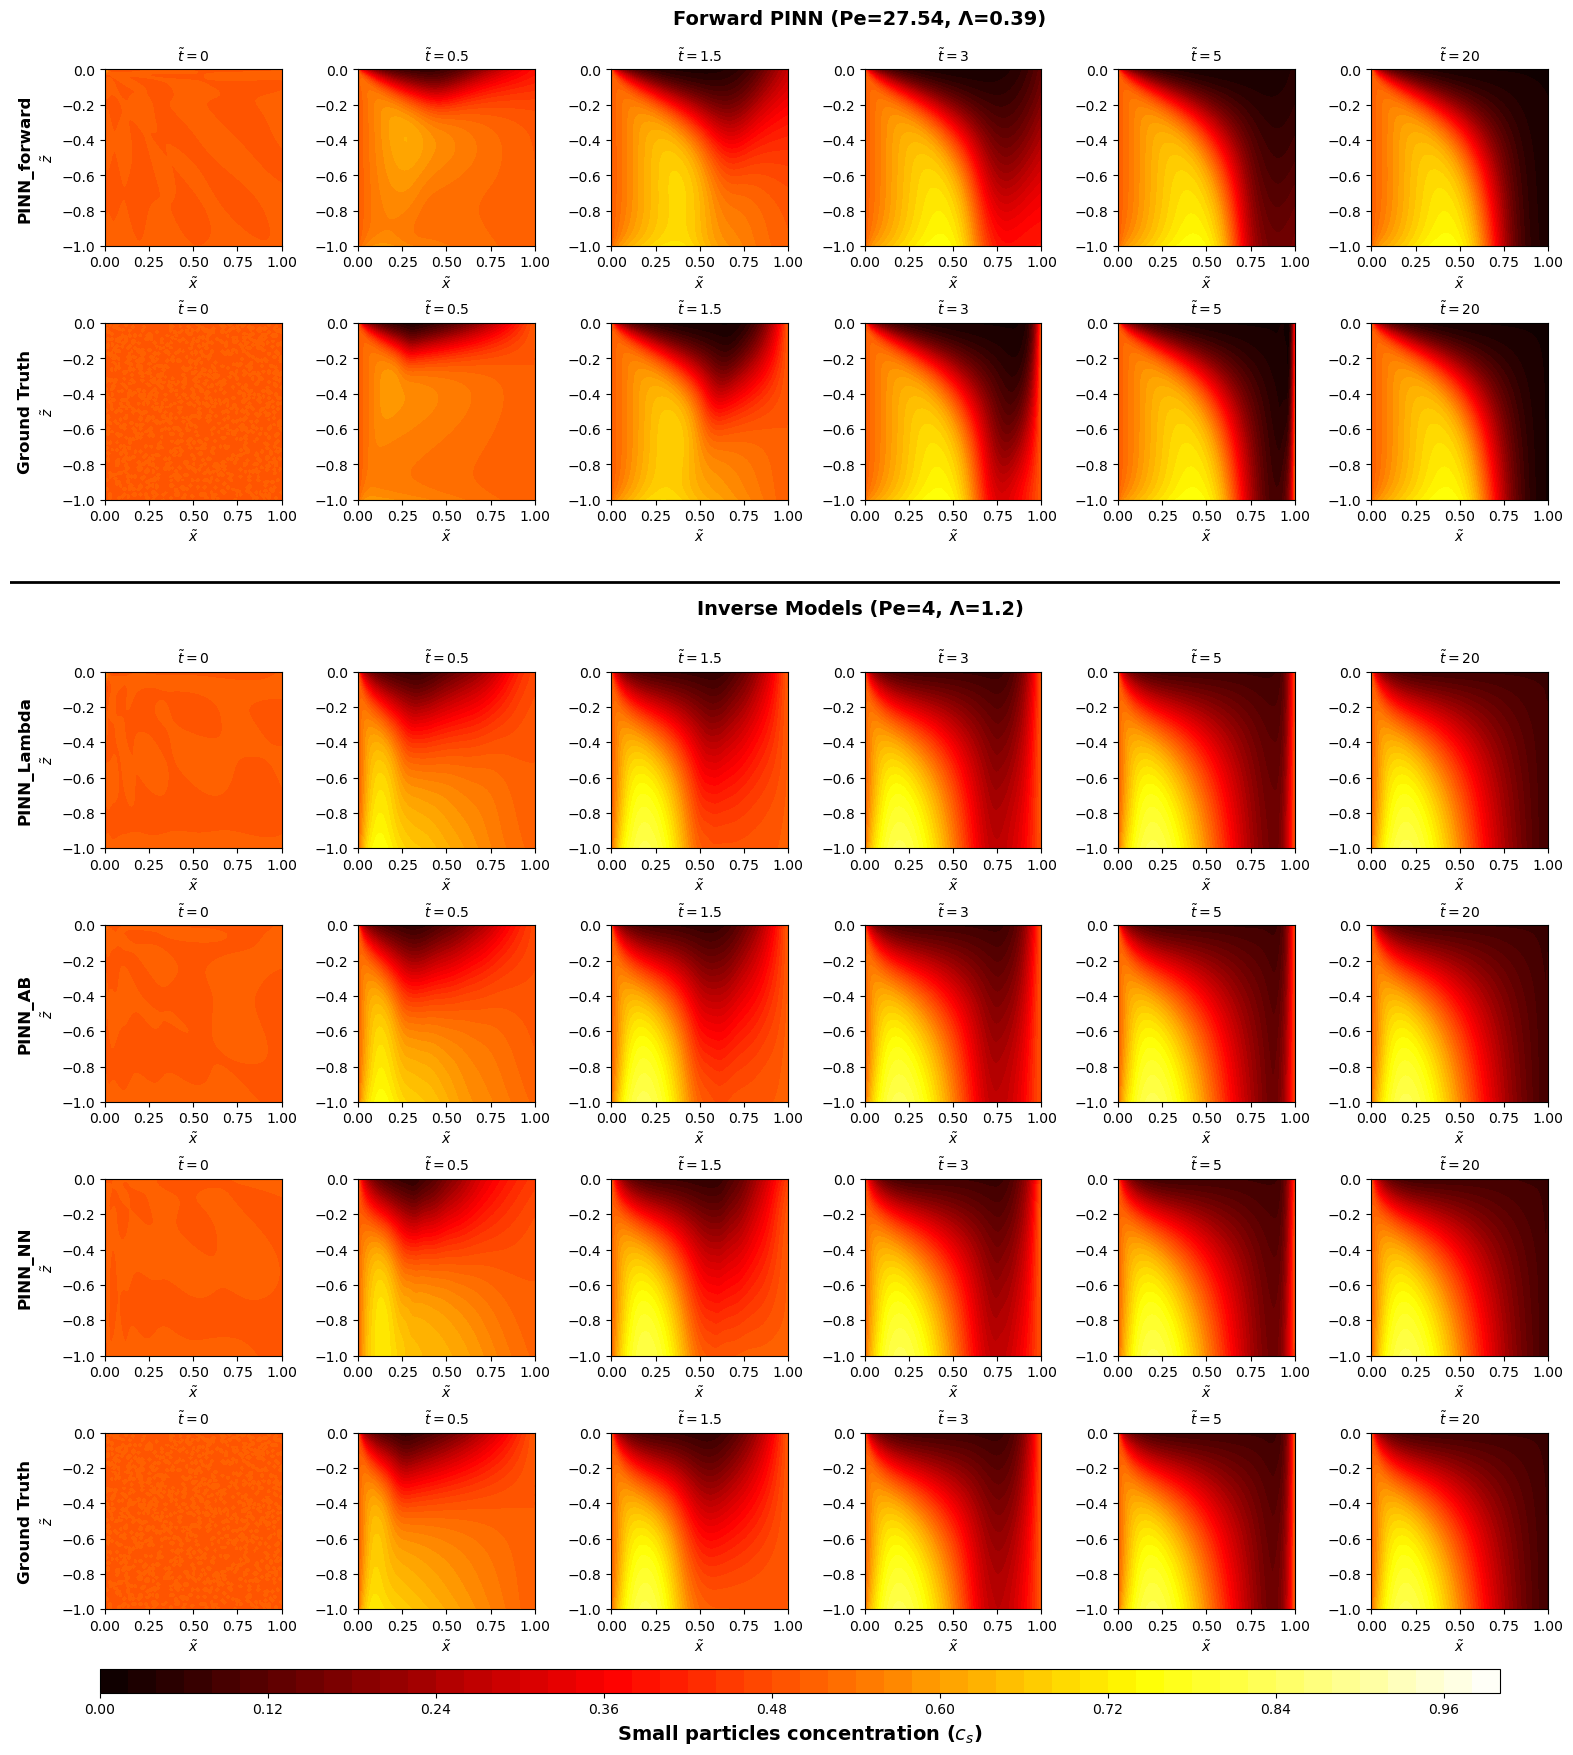

✓ Concentration field plot generated


In [66]:
# Create the plot with specified layout
# Layout: 
# Row 1: PINN_forward results (6 columns for 6 time points)
# Row 2: Ground truth for forward PINN (6 columns)
# Row 3: Horizontal line separator with master colorbar
# Row 4: PINN_Lambda results (6 columns)
# Row 5: PINN_AB results (6 columns)
# Row 6: PINN_NN results (6 columns)
# Row 7: Ground truth for inverse models (6 columns)

# Total rows: 7 (including separator)
# Total columns: 7 (1 for row labels + 6 for time points)

fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(7, 7, hspace=0.5, wspace=0.3, 
                      height_ratios=[1, 1, 0.1, 1, 1, 1, 1],
                      width_ratios=[0.15, 1, 1, 1, 1, 1, 1])

# Define colormap and levels
cmap = 'hot'
levels = np.linspace(0.0, 1.0, 51)

# Store contour objects for master colorbar
all_contours = []

# Row 1: PINN_forward results
if 'PINN_forward' in predictions:
    # Add row label
    ax_label = fig.add_subplot(gs[0, 0])
    ax_label.text(0.5, 0.5, 'PINN_forward', 
                  ha='center', va='center', fontsize=12, fontweight='bold',
                  rotation=90, transform=ax_label.transAxes)
    ax_label.axis('off')
    
    # Add Forward PINN title centered above plots (in first subplot)
    for col, t in enumerate(time_points):
        if t in predictions['PINN_forward']:
            ax = fig.add_subplot(gs[0, col+1])
            X, Z, C = predictions['PINN_forward'][t]
            # Plot 1 - C (as in the notebooks, they plot 1 - C)
            im = ax.contourf(X, Z, 1 - C, levels=levels, cmap=cmap)
            all_contours.append(im)
            ax.set_aspect('equal')
            ax.set_xlabel(r'$\tilde{x}$', fontsize=10)
            if col == 0:
                ax.set_ylabel(r'$\tilde{z}$', fontsize=10)
            # Only show time in subplot
            ax.set_title(f'$\\tilde{{t}}={t}$', fontsize=10)
    
    # Add Forward PINN title centered above row using figure coordinates
    # Get the position of the first plot to calculate center
    if 'PINN_forward' in predictions and time_points:
        first_ax = fig.axes[-6] if len(fig.axes) >= 6 else None
        if first_ax is not None:
            # Calculate center position: middle of columns 1-6
            # Position is approximately at x=0.575 (center of plot area) and y near top of row 0
            fig.text(0.55, 0.91, 'Forward PINN (Pe=27.54, Λ=0.39)', 
                    ha='center', va='top', fontsize=14, fontweight='bold')

# Row 2: Ground truth for forward PINN
if forward_gt_predictions:
    # Add row label
    ax_label = fig.add_subplot(gs[1, 0])
    ax_label.text(0.5, 0.5, 'Ground Truth', 
                  ha='center', va='center', fontsize=12, fontweight='bold',
                  rotation=90, transform=ax_label.transAxes)
    ax_label.axis('off')
    
    for col, t in enumerate(time_points):
        if t in forward_gt_predictions:
            ax = fig.add_subplot(gs[1, col+1])
            X, Z, C = forward_gt_predictions[t]
            im = ax.contourf(X, Z, 1 - C, levels=levels, cmap=cmap)
            all_contours.append(im)
            ax.set_aspect('equal')
            ax.set_xlabel(r'$\tilde{x}$', fontsize=10)
            if col == 0:
                ax.set_ylabel(r'$\tilde{z}$', fontsize=10)
            ax.set_title(f'$\\tilde{{t}}={t}$', fontsize=10)

# Row 3: Horizontal line separator with master colorbar
ax_sep = fig.add_subplot(gs[2, :])
ax_sep.axhline(y=0.5, color='black', linewidth=2)
ax_sep.axis('off')

# Add master colorbar in separator row
if all_contours:
    # Create a colorbar using the first contour
    cbar = plt.colorbar(all_contours[0], ax=ax_sep, orientation='horizontal', 
                        fraction=0.3, pad=0.1, aspect=60)
    cbar.set_label('Small particles concentration ($c_s$)', fontsize=14, fontweight='bold')
    # Position colorbar in the center
    cbar.ax.set_position([0.17, 0.03, 0.7, 0.05]) # order of the arguments is [left, bottom, width, height]

# Row 4: PINN_Lambda results
if 'PINN_Lambda' in predictions:
    # Add row label
    ax_label = fig.add_subplot(gs[3, 0])
    ax_label.text(0.5, 0.5, 'PINN_Lambda', 
                  ha='center', va='center', fontsize=12, fontweight='bold',
                  rotation=90, transform=ax_label.transAxes)
    ax_label.axis('off')
    
    for col, t in enumerate(time_points):
        if t in predictions['PINN_Lambda']:
            ax = fig.add_subplot(gs[3, col+1])
            X, Z, C = predictions['PINN_Lambda'][t]
            im = ax.contourf(X, Z, 1 - C, levels=levels, cmap=cmap)
            all_contours.append(im)
            ax.set_aspect('equal')
            ax.set_xlabel(r'$\tilde{x}$', fontsize=10)
            if col == 0:
                ax.set_ylabel(r'$\tilde{z}$', fontsize=10)
            ax.set_title(f'$\\tilde{{t}}={t}$', fontsize=10)
    
    # Add Inverse Models title centered above row using figure coordinates
    # Position is approximately at x=0.575 (center of plot area) and y near top of row 3
    fig.text(0.55, 0.615, 'Inverse Models (Pe=4, Λ=1.2)', 
            ha='center', va='top', fontsize=14, fontweight='bold')

# Row 5: PINN_AB results
if 'PINN_AB' in predictions:
    # Add row label
    ax_label = fig.add_subplot(gs[4, 0])
    ax_label.text(0.5, 0.5, 'PINN_AB', 
                  ha='center', va='center', fontsize=12, fontweight='bold',
                  rotation=90, transform=ax_label.transAxes)
    ax_label.axis('off')
    
    for col, t in enumerate(time_points):
        if t in predictions['PINN_AB']:
            ax = fig.add_subplot(gs[4, col+1])
            X, Z, C = predictions['PINN_AB'][t]
            im = ax.contourf(X, Z, 1 - C, levels=levels, cmap=cmap)
            all_contours.append(im)
            ax.set_aspect('equal')
            ax.set_xlabel(r'$\tilde{x}$', fontsize=10)
            if col == 0:
                ax.set_ylabel(r'$\tilde{z}$', fontsize=10)
            ax.set_title(f'$\\tilde{{t}}={t}$', fontsize=10)

# Row 6: PINN_NN results
if 'PINN_NN' in predictions:
    # Add row label
    ax_label = fig.add_subplot(gs[5, 0])
    ax_label.text(0.5, 0.5, 'PINN_NN', 
                  ha='center', va='center', fontsize=12, fontweight='bold',
                  rotation=90, transform=ax_label.transAxes)
    ax_label.axis('off')
    
    for col, t in enumerate(time_points):
        if t in predictions['PINN_NN']:
            ax = fig.add_subplot(gs[5, col+1])
            X, Z, C = predictions['PINN_NN'][t]
            im = ax.contourf(X, Z, 1 - C, levels=levels, cmap=cmap)
            all_contours.append(im)
            ax.set_aspect('equal')
            ax.set_xlabel(r'$\tilde{x}$', fontsize=10)
            if col == 0:
                ax.set_ylabel(r'$\tilde{z}$', fontsize=10)
            ax.set_title(f'$\\tilde{{t}}={t}$', fontsize=10)

# Row 7: Ground truth for inverse models
if inverse_gt_data is not None:
    # Add row label
    ax_label = fig.add_subplot(gs[6, 0])
    ax_label.text(0.5, 0.5, 'Ground Truth', 
                  ha='center', va='center', fontsize=12, fontweight='bold',
                  rotation=90, transform=ax_label.transAxes)
    ax_label.axis('off')
    
    for col, t in enumerate(time_points):
        if t in inverse_gt_predictions:
            ax = fig.add_subplot(gs[6, col+1])
            X, Z, C = inverse_gt_predictions[t]
            im = ax.contourf(X, Z, 1 - C, levels=levels, cmap=cmap)
            all_contours.append(im)
            ax.set_aspect('equal')
            ax.set_xlabel(r'$\tilde{x}$', fontsize=10)
            if col == 0:
                ax.set_ylabel(r'$\tilde{z}$', fontsize=10)
            ax.set_title(f'$\\tilde{{t}}={t}$', fontsize=10)

plt.savefig('PINN_Plots.pdf', dpi=600)
plt.show()

print("✓ Concentration field plot generated")


# Predicted vs Actual Concentration Plots

This section generates scatter plots comparing predicted concentration values with ground truth values for each model to assess accuracy.


In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Function to predict concentration at specific (x, z, t) points
def predict_at_points(model_info, x, z, t):
    """
    Predict concentration at specific (x, z, t) points.
    
    Args:
        model_info: Dictionary with 'model' and 'forward_method'
        x, z, t: Arrays of coordinates and time values
    
    Returns:
        Array of predicted concentration values
    """
    model = model_info['model']
    forward_method = model_info['forward_method']
    
    # Convert to tensors
    x_tensor = torch.tensor(x, dtype=torch.float32, device=device).reshape(-1, 1)
    z_tensor = torch.tensor(z, dtype=torch.float32, device=device).reshape(-1, 1)
    t_tensor = torch.tensor(t, dtype=torch.float32, device=device).reshape(-1, 1)
    
    # Predict
    with torch.no_grad():
        if forward_method == 'forward_conc':
            c_pred = model.forward_conc(x_tensor, z_tensor, t_tensor)
        else:
            c_pred = model(x_tensor, z_tensor, t_tensor)
    
    return c_pred.cpu().numpy().flatten()

# Load ground truth data for comparison from Excel files
# Use Forward_data.xlsx for PINN_forward, Inverse_data.xlsx for inverse models
gt_comparison_data_forward = None
gt_comparison_data_inverse = None

# Load forward data
if forward_data_path.exists():
    try:
        gt_comparison_data_forward = pd.read_excel(forward_data_path)
        print(f"✓ Loaded forward ground truth data from {forward_data_path} for comparison")
        print(f"  Total data points: {len(gt_comparison_data_forward)}")
        if 'c' in gt_comparison_data_forward.columns:
            c_gt_fwd = gt_comparison_data_forward['c'].values
            print(f"  Concentration range: [{c_gt_fwd.min():.4f}, {c_gt_fwd.max():.4f}]")
        if 't' in gt_comparison_data_forward.columns:
            t_gt_fwd = gt_comparison_data_forward['t'].values
            print(f"  Time range: [{t_gt_fwd.min():.2f}, {t_gt_fwd.max():.2f}]")
    except Exception as e:
        print(f"✗ Error loading forward data: {e}")

# Load inverse data
if inverse_data_path2.exists():
    try:
        gt_comparison_data_inverse = pd.read_csv(inverse_data_path2)
        print(f"✓ Loaded inverse ground truth data from {inverse_data_path2} for comparison")
        print(f"  Total data points: {len(gt_comparison_data_inverse)}")
        if 'c' in gt_comparison_data_inverse.columns:
            c_gt_inv = gt_comparison_data_inverse['c'].values
            print(f"  Concentration range: [{c_gt_inv.min():.4f}, {c_gt_inv.max():.4f}]")
        if 't' in gt_comparison_data_inverse.columns:
            t_gt_inv = gt_comparison_data_inverse['t'].values
            print(f"  Time range: [{t_gt_inv.min():.2f}, {t_gt_inv.max():.2f}]")
    except Exception as e:
        print(f"✗ Error loading inverse data: {e}")

if gt_comparison_data_forward is None and gt_comparison_data_inverse is None:
    print("⚠ Warning: Ground truth data not found. Cannot generate predicted vs actual plots.")


✓ Loaded forward ground truth data from /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots/Forward_data.xlsx for comparison
  Total data points: 60000
  Concentration range: [0.2413, 1.0040]
  Time range: [0.00, 20.00]
✓ Loaded inverse ground truth data from /Users/amir/Library/CloudStorage/Dropbox-UniversityofMichigan/Amir Nazemi/UMich/Term 05 - Fall 2025/CSE598/Project/FinalModelsPlots/experimental_data.csv for comparison
  Total data points: 1000
  Concentration range: [0.1734, 0.9284]
  Time range: [0.00, 20.00]


In [25]:
# Generate predictions for all models at ground truth points
# Use appropriate ground truth data for each model
model_predictions = {}
model_metrics = {}

for model_name in ['PINN_forward', 'PINN_Lambda', 'PINN_AB', 'PINN_NN']:
    if model_name in loaded_models:
        # Select appropriate ground truth data
        if model_name == 'PINN_forward':
            gt_data_for_model = gt_comparison_data_forward
        else:
            gt_data_for_model = gt_comparison_data_inverse
        
        if gt_data_for_model is not None:
            print(f"\nGenerating predictions for {model_name}...")
            model_info = loaded_models[model_name]
            
            # Extract ground truth values
            x_gt = gt_data_for_model['x'].values
            z_gt = gt_data_for_model['z'].values
            t_gt = gt_data_for_model['t'].values
            c_gt = gt_data_for_model['c'].values
            
            # For forward model, only consider data at t=20.0
            if model_name == 'PINN_forward':
                t_filter = np.abs(t_gt - 20.0) < 1e-6  # Filter for t == 20.0 (with small tolerance for floating point)
                x_gt = x_gt[t_filter]
                z_gt = z_gt[t_filter]
                t_gt = t_gt[t_filter]
                c_gt = c_gt[t_filter]
                print(f"  Filtered to {len(x_gt)} data points at t=20.0 (from {len(gt_data_for_model)} total points)")
            
            # Predict at ground truth points
            c_pred = predict_at_points(model_info, x_gt, z_gt, t_gt)
            
            # Store predictions
            model_predictions[model_name] = {
                'pred': c_pred,
                'gt': c_gt,
                'x': x_gt,
                'z': z_gt,
                't': t_gt
            }
            
            # Calculate metrics
            r2 = r2_score(c_gt, c_pred)
            rmse = np.sqrt(mean_squared_error(c_gt, c_pred))
            mae = mean_absolute_error(c_gt, c_pred)
            
            model_metrics[model_name] = {
                'R2': r2,
                'RMSE': rmse,
                'MAE': mae
            }
            
            print(f"  R² = {r2:.4f}")
            print(f"  RMSE = {rmse:.4f}")
            print(f"  MAE = {mae:.4f}")
        else:
            print(f"\n⚠ Skipping {model_name}: No ground truth data available")

print(f"\n✓ Generated predictions for {len(model_predictions)} models")



Generating predictions for PINN_forward...
  Filtered to 10000 data points at t=20.0 (from 60000 total points)
  R² = 0.9999
  RMSE = 0.0030
  MAE = 0.0022

Generating predictions for PINN_Lambda...
  R² = 1.0000
  RMSE = 0.0015
  MAE = 0.0009

Generating predictions for PINN_AB...
  R² = 1.0000
  RMSE = 0.0015
  MAE = 0.0010

Generating predictions for PINN_NN...
  R² = 0.9998
  RMSE = 0.0028
  MAE = 0.0015

✓ Generated predictions for 4 models


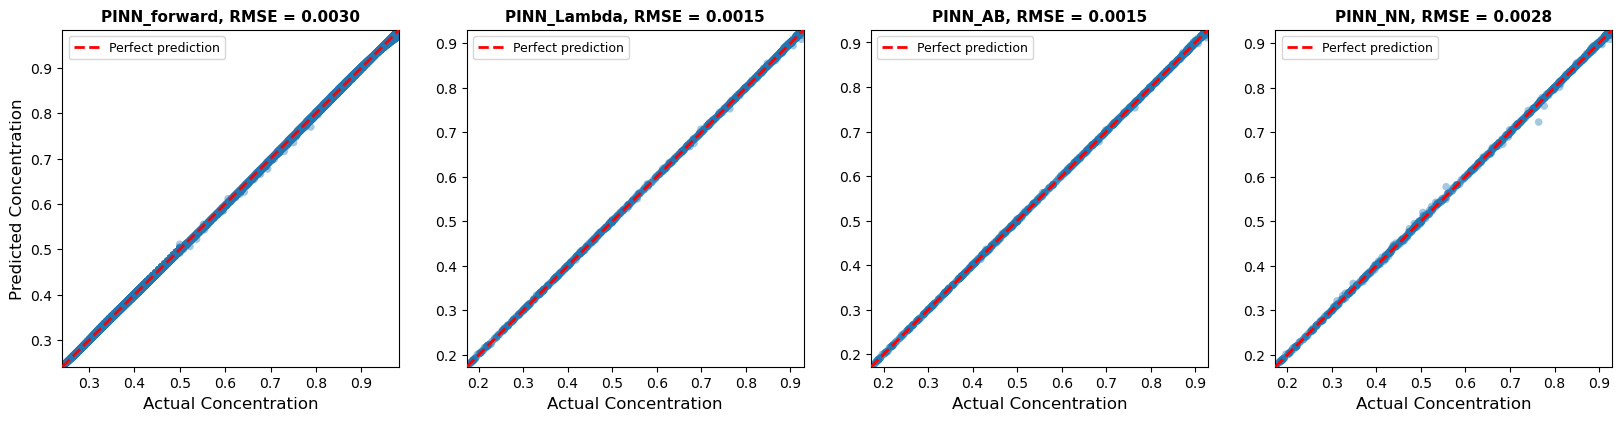


Model Performance Summary
Model                R²         RMSE       MAE       
----------------------------------------------------------------------
PINN_forward         0.9999     0.0030     0.0022    
PINN_Lambda          1.0000     0.0015     0.0009    
PINN_AB              1.0000     0.0015     0.0010    
PINN_NN              0.9998     0.0028     0.0015    

✓ Predicted vs actual plots generated


In [76]:
# Create predicted vs actual scatter plots
if len(model_predictions) > 0:
    # Determine number of models to plot
    model_names = ['PINN_forward', 'PINN_Lambda', 'PINN_AB', 'PINN_NN']
    available_models = [name for name in model_names if name in model_predictions]
    n_models = len(available_models)
    
    if n_models == 0:
        print("No models available for plotting.")
    else:
        # Create figure with subplots
        fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 5))
        
        # If only one model, make axes iterable
        if n_models == 1:
            axes = [axes]
        
        # Plot each model
        for idx, model_name in enumerate(available_models):
            ax = axes[idx]
            pred_data = model_predictions[model_name]
            c_pred = pred_data['pred']
            c_gt = pred_data['gt']
            metrics = model_metrics[model_name]
            
            # Create scatter plot
            # Use alpha and smaller markers for better visualization with many points
            ax.scatter(c_gt, c_pred, alpha=0.40, s=30, edgecolors='none')
            
            # Add perfect prediction line (y = x)
            min_val = min(c_gt.min(), c_pred.min())
            max_val = max(c_gt.max(), c_pred.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
                   label='Perfect prediction', zorder=10)
            
            # Set labels and title
            ax.set_xlabel('Actual Concentration', fontsize=12)
            if idx == 0:
                ax.set_ylabel('Predicted Concentration', fontsize=12)
            ax.set_title(f'{model_name}, RMSE = {metrics["RMSE"]:.4f}', 
                        fontsize=11, fontweight='bold')
            
            # Set equal aspect ratio and limits
            ax.set_aspect('equal', adjustable='box')
            ax.set_xlim([min_val, max_val])
            ax.set_ylim([min_val, max_val])
            
            # Add grid
            # ax.grid(True, alpha=0.3)
            
            # Add legend
            ax.legend(loc='upper left', fontsize=9)
        
        # plt.tight_layout()
        # plt.suptitle('Predicted vs Actual Concentration', fontsize=14, fontweight='bold', y=1.06)
        plt.savefig('Predicted_vs_Actual.pdf', dpi=600)
        plt.show()
        
        # Print summary table
        print("\n" + "="*70)
        print("Model Performance Summary")
        print("="*70)
        print(f"{'Model':<20} {'R²':<10} {'RMSE':<10} {'MAE':<10}")
        print("-"*70)
        for model_name in available_models:
            metrics = model_metrics[model_name]
            print(f"{model_name:<20} {metrics['R2']:<10.4f} {metrics['RMSE']:<10.4f} {metrics['MAE']:<10.4f}")
        print("="*70)
        
        print("\n✓ Predicted vs actual plots generated")
else:
    print("⚠ Cannot generate plots: Model predictions not available.")


# Parameter Evolution Plots

This section plots the evolution of learned material parameters (Lambda, A, B) during training and compares the neural network segregation velocity with the functional form.


/var/folders/z2/b9mwkx516g1frwq_7njhss4c0000gp/T/ipykernel_15976/812589319.py:209: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


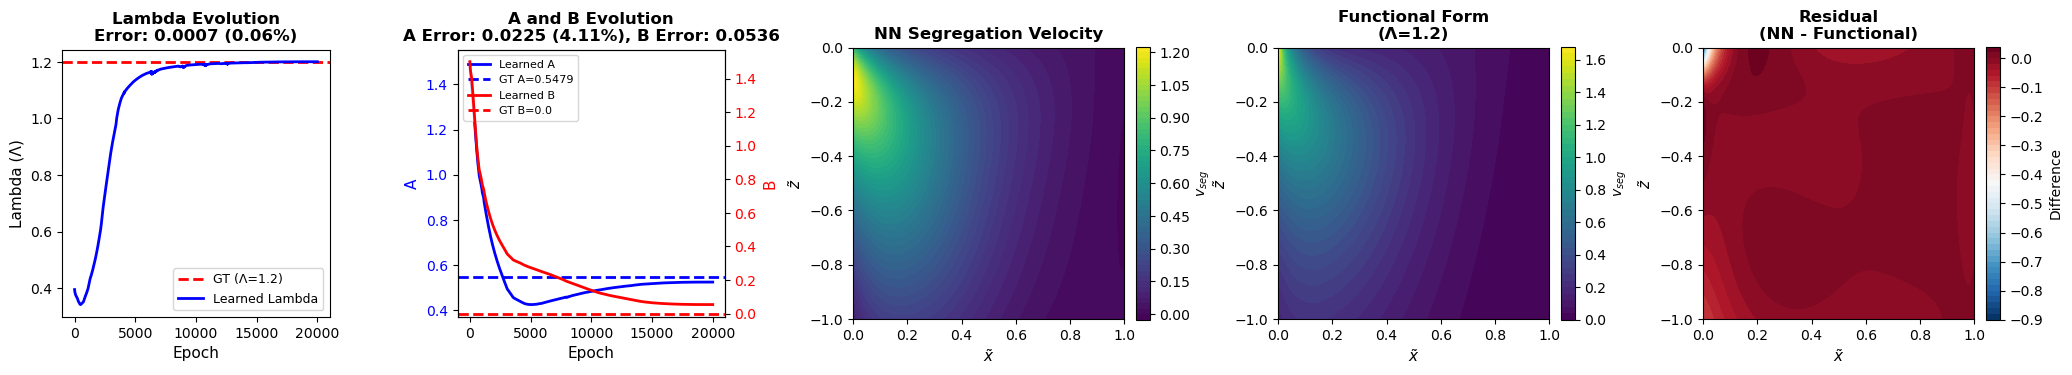

Parameter Evolution Summary
Lambda: Final=1.200664, GT=1.200000, Error=0.000664
A:      Final=0.525407, GT=0.547900, Error=0.022493
B:      Final=0.053641, GT=0.000000, Error=0.053641

Segregation Velocity Residual Statistics:
  Mean: -0.005240
  Std:  0.031751
  Max:  0.030651
  Min:  -0.890616


In [78]:
# Combined Parameter Evolution and Segregation Velocity Comparison Plot
# Create a single figure with 5 subplots in 1 row:
# 1. Lambda evolution
# 2. A and B evolution (combined with twin y-axes)
# 3. NN segregation velocity
# 4. Functional form segregation velocity
# 5. Residual (NN - Functional)

# Helper functions for segregation velocity
def g_profile(z, k):
    """Profile function g(z) - matches the implementation in PINN notebooks"""
    if not isinstance(k, torch.Tensor):
        k = torch.tensor(float(k), dtype=z.dtype, device=z.device)
    g_val = (k**2 / (2 * (1 - torch.exp(-k)))) * torch.exp(k * z)
    return g_val

def gamma_dot(z, k):
    """Shear rate function - returns g(z) value"""
    return g_profile(z, k)

# Create figure with 5 subplots in 1 row
fig = plt.figure(figsize=(25, 5))
gs = fig.add_gridspec(1, 5, hspace=0.3, wspace=0.45, width_ratios=[0.90, 0.90, 1, 1, 1])

# Calculate a consistent box aspect for all subplots
# Use a reasonable aspect ratio that works for both line plots and contour plots
box_aspect = 1.0  # This will make all subplots have the same height

# Initialize data containers
lambda_data = None
A_data = None
B_data = None
segregation_data = None

# Subplot 1: Lambda evolution
if 'PINN_Lambda' in models_data:
    loss_history = models_data['PINN_Lambda']['loss_history']
    if loss_history:
        lambda_key = None
        for key in ['lambda', 'Lambda']:
            if key in loss_history[0]:
                lambda_key = key
                break
        
        if lambda_key:
            epochs_lambda = [h['epoch'] for h in loss_history]
            lambda_values = [h[lambda_key] for h in loss_history]
            lambda_gt = 1.2
            final_lambda = lambda_values[-1]
            lambda_error = abs(final_lambda - lambda_gt)
            lambda_error_pct = (lambda_error / lambda_gt) * 100
            
            ax1 = fig.add_subplot(gs[0, 0])
            ax1.axhline(y=lambda_gt, color='r', linestyle='--', linewidth=2, label=f'GT (Λ={lambda_gt})')
            ax1.plot(epochs_lambda, lambda_values, 'b-', linewidth=2, label='Learned Lambda')
            ax1.set_xlabel('Epoch', fontsize=11)
            ax1.set_ylabel('Lambda (Λ)', fontsize=11)
            ax1.set_title(f'Lambda Evolution\nError: {lambda_error:.4f} ({lambda_error_pct:.2f}%)', 
                         fontsize=12, fontweight='bold')
            ax1.legend(fontsize=9)
            # ax1.grid(True, alpha=0.3)
            # Set box aspect to match other subplots
            try:
                ax1.set_box_aspect(box_aspect)
            except AttributeError:
                # Fallback for older matplotlib versions
                pass
            lambda_data = {'final': final_lambda, 'gt': lambda_gt, 'error': lambda_error}

# Subplot 2: A and B evolution (combined with twin y-axes)
if 'PINN_AB' in models_data:
    loss_history = models_data['PINN_AB']['loss_history']
    if loss_history and 'A' in loss_history[0] and 'B' in loss_history[0]:
        epochs_AB = [h['epoch'] for h in loss_history]
        A_values = [h['A'] for h in loss_history]
        B_values = [h['B'] for h in loss_history]
        A_gt = 0.5479
        B_gt = 0.0
        final_A = A_values[-1]
        final_B = B_values[-1]
        A_error = abs(final_A - A_gt)
        B_error = abs(final_B - B_gt)
        A_error_pct = (A_error / A_gt) * 100 if A_gt != 0 else 0
        
        ax2 = fig.add_subplot(gs[0, 1])
        # Plot A on left y-axis
        ax2.plot(epochs_AB, A_values, 'b-', linewidth=2, label='Learned A')
        ax2.axhline(y=A_gt, color='b', linestyle='--', linewidth=2, label=f'GT A={A_gt}')
        ax2.set_xlabel('Epoch', fontsize=11)
        ax2.set_ylabel('A', fontsize=11, color='b')
        ax2.tick_params(axis='y', labelcolor='b')
        # ax2.grid(True, alpha=0.3)
        
        
        # Create twin axis for B on right y-axis
        ax2_twin = ax2.twinx()
        ax2_twin.plot(epochs_AB, B_values, 'r-', linewidth=2, label='Learned B')
        ax2_twin.axhline(y=B_gt, color='r', linestyle='--', linewidth=2, label=f'GT B={B_gt}')
        ax2_twin.set_ylabel('B', fontsize=11, color='r')
        ax2_twin.tick_params(axis='y', labelcolor='r')
        
        ax2.set_title(f'A and B Evolution\nA Error: {A_error:.4f} ({A_error_pct:.2f}%), B Error: {B_error:.4f}', 
                     fontsize=12, fontweight='bold')
        
        # Combine legends
        lines1, labels1 = ax2.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=8)
        
        A_data = {'final': final_A, 'gt': A_gt, 'error': A_error}
        B_data = {'final': final_B, 'gt': B_gt, 'error': B_error}
        # Set box aspect to match other subplots
        try:
            ax2.set_box_aspect(box_aspect)
        except AttributeError:
            # Fallback for older matplotlib versions
            pass

# Subplot 3: NN Segregation Velocity
# Subplot 4: Functional Form Segregation Velocity
# Subplot 5: Residual
if 'PINN_NN' in loaded_models:
    model_info = loaded_models['PINN_NN']
    model = model_info['model']
    x_min = model_info['x_min']
    x_max = model_info['x_max']
    z_min = model_info['z_min']
    z_max = model_info['z_max']
    
    checkpoint = models_data['PINN_NN']['checkpoint']
    k = checkpoint.get('k', 2.3)
    Pe = checkpoint.get('Pe', 4.0)
    t_value = 20.0
    
    n_x, n_z = 100, 100
    x_vis = torch.linspace(x_min, x_max, n_x, device=device).reshape(-1, 1)
    z_vis = torch.linspace(z_min, z_max, n_z, device=device).reshape(-1, 1)
    X_vis, Z_vis = torch.meshgrid(x_vis.squeeze(), z_vis.squeeze(), indexing='ij')
    t_vis = torch.ones_like(X_vis.reshape(-1, 1)) * t_value
    
    model.eval()
    with torch.no_grad():
        c_vis = model.forward_conc(X_vis.reshape(-1, 1), Z_vis.reshape(-1, 1), t_vis)
        gamma_dot_vis = gamma_dot(Z_vis.reshape(-1, 1), k)
        v_seg_nn = model.forward_seg(X_vis.reshape(-1, 1), Z_vis.reshape(-1, 1), 
                                     t_vis, gamma_dot_vis, c_vis)
        V_seg_nn = v_seg_nn.reshape(n_x, n_z).cpu().numpy()
        
        Lambda_gt = 1.2
        g_val = g_profile(Z_vis.reshape(-1, 1), k)
        v_seg_func = Lambda_gt * (1 - X_vis.reshape(-1, 1)) * g_val * (1 - c_vis.reshape(-1, 1))
        V_seg_func = v_seg_func.reshape(n_x, n_z).cpu().numpy()
        V_seg_residual = V_seg_nn - V_seg_func
    
    # Subplot 3: NN Segregation Velocity
    ax3 = fig.add_subplot(gs[0, 2])
    im3 = ax3.contourf(X_vis.cpu().numpy(), Z_vis.cpu().numpy(), V_seg_nn, levels=50, cmap='viridis')
    ax3.set_xlabel(r'$\tilde{x}$', fontsize=11)
    ax3.set_ylabel(r'$\tilde{z}$', fontsize=11)
    ax3.set_title('NN Segregation Velocity', fontsize=12, fontweight='bold')
    ax3.set_aspect('equal')
    # Set box aspect to match other subplots
    try:
        ax3.set_box_aspect(box_aspect)
    except AttributeError:
        # Fallback for older matplotlib versions
        pass
    plt.colorbar(im3, ax=ax3, label='$v_{seg}$', fraction=0.046, pad=0.04)
    
    # Subplot 4: Functional Form Segregation Velocity
    ax4 = fig.add_subplot(gs[0, 3])
    im4 = ax4.contourf(X_vis.cpu().numpy(), Z_vis.cpu().numpy(), V_seg_func, levels=50, cmap='viridis')
    ax4.set_xlabel(r'$\tilde{x}$', fontsize=11)
    ax4.set_ylabel(r'$\tilde{z}$', fontsize=11)
    ax4.set_title(f'Functional Form\n(Λ={Lambda_gt})', fontsize=12, fontweight='bold')
    ax4.set_aspect('equal')
    # Set box aspect to match other subplots
    try:
        ax4.set_box_aspect(box_aspect)
    except AttributeError:
        # Fallback for older matplotlib versions
        pass
    plt.colorbar(im4, ax=ax4, label='$v_{seg}$', fraction=0.046, pad=0.04)
    
    # Subplot 5: Residual
    ax5 = fig.add_subplot(gs[0, 4])
    im5 = ax5.contourf(X_vis.cpu().numpy(), Z_vis.cpu().numpy(), V_seg_residual, levels=50, cmap='RdBu_r')
    ax5.set_xlabel(r'$\tilde{x}$', fontsize=11)
    ax5.set_ylabel(r'$\tilde{z}$', fontsize=11)
    ax5.set_title(f'Residual\n(NN - Functional)', fontsize=12, fontweight='bold')
    ax5.set_aspect('equal')
    # Set box aspect to match other subplots
    try:
        ax5.set_box_aspect(box_aspect)
    except AttributeError:
        # Fallback for older matplotlib versions
        pass
    plt.colorbar(im5, ax=ax5, label='Difference', fraction=0.046, pad=0.04)
    
    segregation_data = {
        'mean': np.mean(V_seg_residual),
        'std': np.std(V_seg_residual),
        'max': np.max(V_seg_residual),
        'min': np.min(V_seg_residual)
    }

# plt.suptitle('Parameter Evolution and Segregation Velocity Comparison', 
            # fontsize=16, fontweight='bold', y=0.90)
plt.tight_layout()
plt.savefig('Segregation_Velocity_Comparison.pdf', dpi=600)
plt.show()

# Print summary statistics
print("="*70)
print("Parameter Evolution Summary")
print("="*70)
if lambda_data:
    print(f"Lambda: Final={lambda_data['final']:.6f}, GT={lambda_data['gt']:.6f}, Error={lambda_data['error']:.6f}")
if A_data:
    print(f"A:      Final={A_data['final']:.6f}, GT={A_data['gt']:.6f}, Error={A_data['error']:.6f}")
if B_data:
    print(f"B:      Final={B_data['final']:.6f}, GT={B_data['gt']:.6f}, Error={B_data['error']:.6f}")
if segregation_data:
    print(f"\nSegregation Velocity Residual Statistics:")
    print(f"  Mean: {segregation_data['mean']:.6f}")
    print(f"  Std:  {segregation_data['std']:.6f}")
    print(f"  Max:  {segregation_data['max']:.6f}")
    print(f"  Min:  {segregation_data['min']:.6f}")
print("="*70)
